https://watlab-blog.com/2019/04/21/python-fft/

In [6]:
import fft_function
import numpy as np
import matplotlib.pyplot as plt
import filter_function

%matplotlib inline

In [9]:
samplerate = 25600
Fs = 4096       #フレームサイズ
overlap = 90    #オーバーラップ率

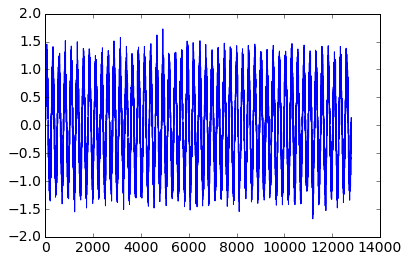

In [11]:
x = np.arange(0, 12800)/samplerate   #波形生成のための間軸の作成
data = np.sin(2.0 * np.pi * 100 * x) + 0.2 * np.random.randn(len(x)) #サイン波にランダム成分を重畳
plt.plot(data)

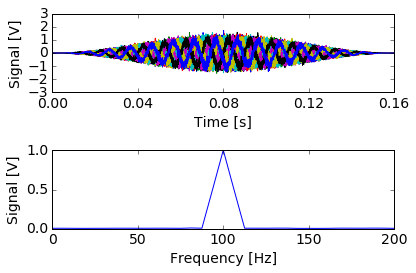

In [12]:
#作成した関数を実行：オーバーラップ抽出された時間波形配列
time_array, N_ave = fft_function.ov(data, samplerate, Fs, overlap)
#len(time_array), N_ave, time_array[0].shape

#作成した関数を実行：ハニング窓関数をかける
time_array, acf = fft_function.hanning(time_array, Fs, N_ave)
#len(time_array), acf, time_array[0].shape

#作成した関数を実行：FFTをかける
fft_array, fft_mean, fft_axis = fft_function.fft_ave(time_array, samplerate, Fs, N_ave, acf)
#fft_array.shape, fft_mean.shape, fft_axis.shape

t = np.arange(0, Fs)/samplerate     #グラフ描画のためのフレーム時間軸作成

# フォントの種類とサイズを設定する。
plt.rcParams['font.size'] = 14
plt.rcParams['font.family'] = 'Times New Roman'
 
# 目盛を内側にする。
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
 
# グラフの上下左右に目盛線を付ける。
fig = plt.figure()
ax1 = fig.add_subplot(211)
ax1.yaxis.set_ticks_position('both')
ax1.xaxis.set_ticks_position('both')
ax2 = fig.add_subplot(212)
ax2.yaxis.set_ticks_position('both')
ax2.xaxis.set_ticks_position('both')
 
# 軸のラベルを設定する。
ax1.set_xlabel('Time [s]')
ax1.set_ylabel('Signal [V]')
ax2.set_xlabel('Frequency [Hz]')
ax2.set_ylabel('Signal [V]')
 
#データの範囲と刻み目盛を明示する。
ax1.set_xticks(np.arange(0, 2, 0.04))
ax1.set_yticks(np.arange(-5, 5, 1))
ax1.set_xlim(0, 0.16)
ax1.set_ylim(-3, 3)
ax2.set_xticks(np.arange(0, samplerate, 50))
ax2.set_yticks(np.arange(0, 3, 0.5))
ax2.set_xlim(0,200)
ax2.set_ylim(0, 1)

 
# データプロットの準備とともに、ラベルと線の太さ、凡例の設置を行う。
for i in range(N_ave):
    ax1.plot(t, time_array[i], label='signal', lw=1)

ax2.plot(fft_axis, fft_mean, label='signal', lw=1)
 
fig.tight_layout()
 
# グラフを表示する。
plt.show()
plt.close()

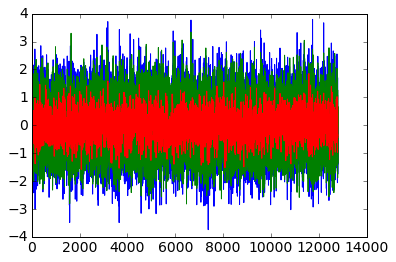

In [13]:
samplerate = 25600                                   #波形のサンプリングレート
x = np.arange(0, 12800) / samplerate                 #波形生成のための時間軸の作成
data = np.random.normal(loc=0, scale=1, size=len(x)) #ガウシアンノイズを生成
 
fp = 3000       #通過域端周波数[Hz]
fs = 1500       #阻止域端周波数[Hz]
gpass = 3       #通過域端最大損失[dB]
gstop = 40      #阻止域端最小損失[dB]
 
data_filt_hp = filter_function.highpass(data, samplerate, fp, fs, gpass, gstop)

fp = 3000       #通過域端周波数[Hz]
fs = 6000       #阻止域端周波数[Hz]
gpass = 3       #通過域端最大損失[dB]
gstop = 40      #阻止域端最小損失[dB]
 
data_filt_lp = filter_function.lowpass(data, samplerate, fp, fs, gpass, gstop)

plt.plot(data)
plt.plot(data_filt_hp)
plt.plot(data_filt_lp)

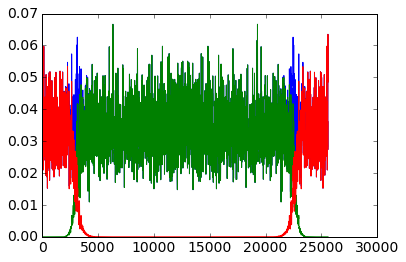

In [14]:
time_array, N_ave = fft_function.ov(data, samplerate, Fs, overlap)
time_array, acf = fft_function.hanning(time_array, Fs, N_ave)
fft_array, fft_mean, fft_axis = fft_function.fft_ave(time_array, samplerate, Fs, N_ave, acf)
plt.plot(fft_axis, fft_mean, label='signal', lw=1)

time_array, N_ave = fft_function.ov(data_filt_hp, samplerate, Fs, overlap)
time_array, acf = fft_function.hanning(time_array, Fs, N_ave)
fft_array, fft_mean, fft_axis = fft_function.fft_ave(time_array, samplerate, Fs, N_ave, acf)
plt.plot(fft_axis, fft_mean, label='signal', lw=1)

time_array, N_ave = fft_function.ov(data_filt_lp, samplerate, Fs, overlap)
time_array, acf = fft_function.hanning(time_array, Fs, N_ave)
fft_array, fft_mean, fft_axis = fft_function.fft_ave(time_array, samplerate, Fs, N_ave, acf)
plt.plot(fft_axis, fft_mean, label='signal', lw=1)